<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('/datasets/insurance.csv')

In [3]:
#Функция информации о таблицах
def check(df):

    print('Первые пять строк: \n', df.head())
    print('########################')
    print('Информация о талице: \n', df.info())
    print('########################')
    
    display(pd.DataFrame(round((df.isna().mean()*100),2), columns=['NaNs, %']).sort_values(by='NaNs, %', ascending=False).style.format(
    '{:.2f}').background_gradient('coolwarm'))
    print('########################')
    print('Количество дупликатов в таблице: \n', df.duplicated().sum())
    print('########################')

In [4]:
check(data)

Первые пять строк: 
    Пол  Возраст  Зарплата  Члены семьи  Страховые выплаты
0    1     41.0   49600.0            1                  0
1    0     46.0   38000.0            1                  1
2    0     29.0   21000.0            0                  0
3    0     21.0   41700.0            2                  0
4    1     28.0   26100.0            0                  0
########################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
Информация о талице: 
 None
########################


,"NaNs, %"
Пол,0.00
Возраст,0.00
Зарплата,0.00
Члены семьи,0.00
Страховые выплаты,0.00


########################
Количество дупликатов в таблице: 
 153
########################


In [5]:
#Удалим дупликаты
data = data.drop_duplicates()

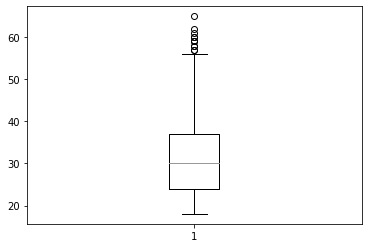

In [6]:
plt.boxplot(data['Возраст'])
plt.show()

Аномальных значений в колонке возраст нет

<AxesSubplot:>

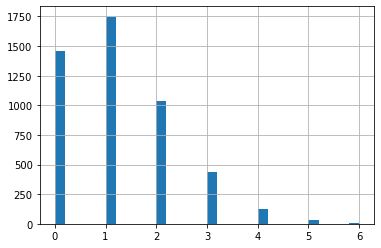

In [7]:
data['Члены семьи'].hist(bins = 30)

Аномальных значений в колонке члены семьи нет

<AxesSubplot:>

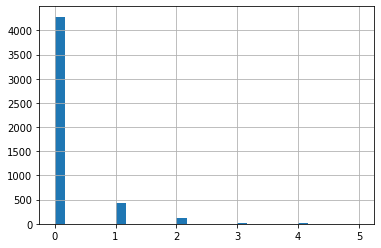

In [8]:
data['Страховые выплаты'].hist(bins = 30)

Аномальных значений в колонке члены семьи нет

Изменим тип данных в столбцах Возраст и Зарплата на целочисленный

In [9]:
data['Возраст'] = data['Возраст'].astype('int')
data['Зарплата'] = data['Зарплата'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4847 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                4847 non-null   int64
 1   Возраст            4847 non-null   int64
 2   Зарплата           4847 non-null   int64
 3   Члены семьи        4847 non-null   int64
 4   Страховые выплаты  4847 non-null   int64
dtypes: int64(5)
memory usage: 227.2 KB


### Вывод

Были загружены и исследованы данные, проверены на пропуски, аномалии, дупликаты. 153 дупликата было удалено.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** b - не изменится

**Обоснование:** ниже

Так как в задании сказано, что матрица признаков умножается на обратимую матрицу, то матрица P - квадратная.
Согласно заданию вектор предсказаний равен:

$$
a1 = X*w1 = ((XP)^T XP)^{-1} (XP)^T y
$$

Раскроем транспонирование по формуле: $$(A*B)^T = B^T * A^T$$

Получаем:
$$
a1 = X*w1 = (P^T*X^TXP)^{-1} P^T*X^T y
$$

Так как умножение матриц ассоциативно:
$$
a1 = X*w1 = X*P*(P^T*(X^TX)*P)^{-1} P^T*X^T y
$$

P - по условию квадратная матрица => $P^T$ - квадратная матрица. Пусть матрица X размера mxn. Рассмотрим произведение $X^T*X$. Так как $X^T$ - транспонированная матрица X, размер которой mxn, то размер $X^T$ - nxm.
Получается произведение матрицы размером mxn и матрицы nxm. В результате произведения $X^T*X$ получим квадратную матрицу размером mxm => квадратную матрицу. Получается, что произведение матриц $P^T*(X^TX)*P$ - произведение квадратных матриц => $(P^T*(X^TX)*P)^{-1}$ можно раскрыть как $P^{-1}*(X^T*X)^{-1}*(P^T)^{-1}$

Получаем:
$$
a1 = X*P*P^{-1}*(X^T*X)^{-1}*(P^T)^{-1}* P^T*X^T*y
$$

 Так как P - квадратная матрица, то $P*P^{-1} = E$ и $(P^T)^{-1}*P^T = E$<br>
 Подставим:<br>
$$ a1 = X*E*(X^T*X)^{-1}*E*X^T*y$$

При умножении матрицы на единичную матрицу получается та же самая матрица:
$$ a1 = X*(X^T*X)^{-1}*X^T*y$$

Получается, что a = a1

### Вывод

При умножении признаков на обратимую матрицу качество линейной регрессии не изменится. Зависимость между параметрами линейная.

## Алгоритм преобразования

**Алгоритм**

...

Умножим матрицу признаков X размера mxn на случайную квадратную матрицу P размера nxn. Затем объединим полученную матрицу с столбцом целевых признаков и получим преобразованные данные в формате датесета.

In [10]:
def test(column):
    global new_data
    global matr
    par = len(data.columns) - len([column])
    matr = np.random.normal(size = (par, par))
    if np.linalg.det(matr)!=0:
        new_data = np.array(data.drop(column, axis = 1)) @ matr
        new_data = pd.DataFrame(new_data, data.index, columns=[i for i in data.columns.drop(column)])
        full_data = new_data.merge(data[column], how ='left', left_index=True, right_index=True)
        return full_data
    else:
        return print('Матрица вырожденна')


In [11]:
df = test('Страховые выплаты')
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,21673.280774,10732.983739,5054.312420,-34467.624828,0
1,16623.551492,8222.510906,3875.170681,-26413.566607,1
2,9190.944804,4545.300279,2141.621404,-14598.194205,0
3,18205.798753,9017.485408,4247.271922,-28970.194710,0
4,11412.015510,5650.841403,2660.673858,-18141.023073,0


**Обоснование**

...

Как было доказано в прошлой главе: при умножении признаков на обратимую матрицу, качество линейной регрессии не изменится, значит мы можем записать данные в виде результата произведения признаков и обратимой матрицы.

### Вывод

Написан и описан алгоритм преобразования исходных данных, чтобы по ним было сложно восстановить персональную информацию, без ухудшения качества моделей машинного обучения

## Проверка алгоритма

In [12]:
#Создадим выборки
futures = data.drop('Страховые выплаты', axis = 1)
target = data['Страховые выплаты']
new_data_futures = new_data

In [13]:
def pred_score(x,y):
    model = LinearRegression()
    model.fit(x, y)
    predictions = model.predict(x)
    return predictions

In [14]:
print('Качество модели до преобразований:', r2_score(target, pred_score(futures, target)))
print('Качество модели после преобразований:', r2_score(target, pred_score(new_data_futures, target)))

Качество модели до преобразований: 0.4302010046633359
Качество модели после преобразований: 0.43020100466334277


### Вывод

Проверка пройдена успешно, качество модели до преобразований и после - не отличается. Метод умножения признаков на обратимую матрицу для защиты данных пользователей проверен, разработан и протестирован алгоритм.